## MBKMUN001- ML KNN Image Classification

### Preprocessing

In [47]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# Function to extract features from an image
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        if img is not None:
            images.append(np.array(img))
    return images
X = []
y = []

# Dataset local path
Dataset = '/home/nathan/Documents/EEE4114F/MBKMUN001_ML_Project/Dataset'
for i, folder_name in enumerate(os.listdir(Dataset)):
    folder_path = os.path.join(Dataset, folder_name)
    images = load_images_from_folder(folder_path)
    X.extend(images)
    y.extend([i] * len(images))
X = np.array(X)
y = np.array(y)

### Model Training and evaluation

In [49]:
# Flatten the images
X = X.reshape(len(X), -1)
print(X.shape)
print(y.shape)
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

(375, 2352)
(375,)


### Accuracy

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8133333333333334


### Classification Report

In [51]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.95      0.78        19
           1       1.00      0.24      0.38        17
           2       0.93      1.00      0.97        14
           3       0.79      1.00      0.88        15
           4       1.00      1.00      1.00        10

    accuracy                           0.81        75
   macro avg       0.88      0.84      0.80        75
weighted avg       0.86      0.81      0.77        75



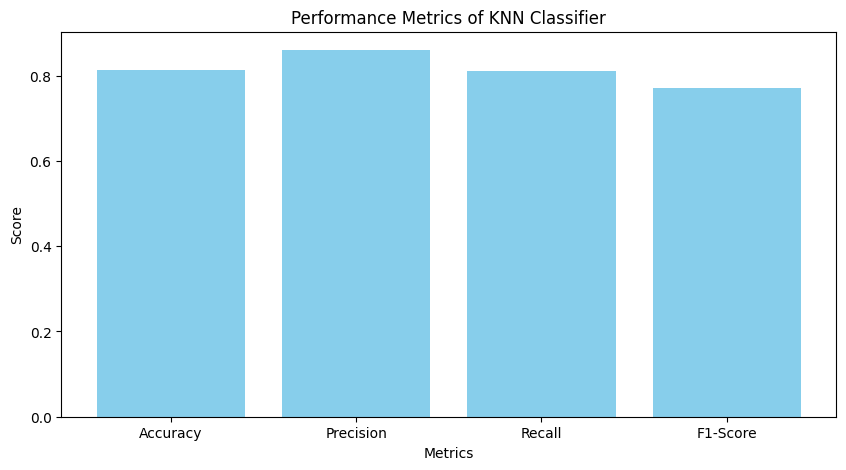

In [52]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, 0.86, 0.81, 0.77]

plt.figure(figsize=(10, 5))

# Plotting the metrics
plt.bar(metrics, values, color='skyblue')

# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Performance Metrics of KNN Classifier')

# Display the plot
plt.show()

### Confusion Matrix

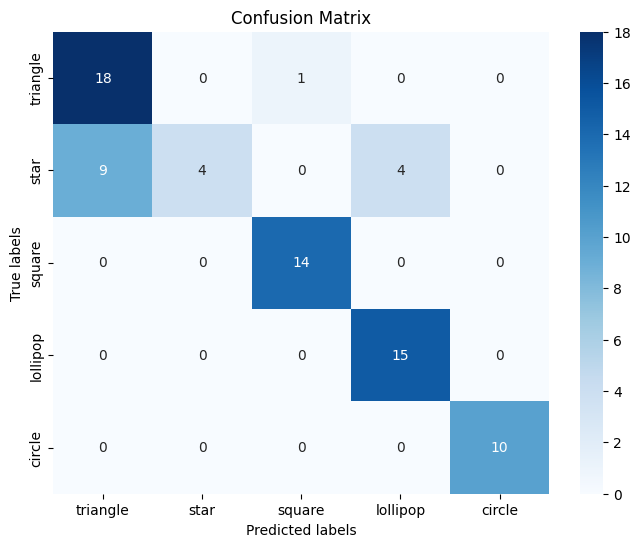

In [53]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=os.listdir(Dataset), yticklabels=os.listdir(Dataset))
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()